In [246]:
import numpy as np
from finta import TA
import pandas as pd
import yfinance as yf

In [247]:
# Download training set
dataset_train_unprocessed = yf.download('GOOG', end=pd.Timestamp.now() - pd.Timedelta(days=30), interval='1d')
# dataset_train_unprocessed = pd.read_csv("training_set1.csv", index_col="Date", parse_dates=True)

In [248]:
# Save training set
# dataset_train.to_csv("training_set1.csv", index_label="Date")

# Technical analysis added
def add_technical_analysis(df):
    df['RSI'] = TA.RSI(df)
    df['WMA'] = TA.WMA(df)
    macd_df = TA.MACD(df)
    df = pd.concat([df, macd_df], axis=1)
    df.dropna(inplace=True)
    return df

dataset_train = add_technical_analysis(dataset_train_unprocessed)

training_set = dataset_train.values
dataset_train

,Open,High,Low,Close,Adj Close,Volume,RSI,WMA,MACD,SIGNAL
Date,,,,,,,,,,
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252,49.049201,52.276942,-0.122833,0.001699
2004-09-01,51.158245,51.292744,49.648903,49.937820,49.937820,9181687,43.138112,51.777591,-0.224212,-0.048918
2004-09-02,49.409801,50.993862,49.285267,50.565468,50.565468,15190525,47.210094,51.404766,-0.260888,-0.095296
2004-09-03,50.286514,50.680038,49.474556,49.818268,49.818268,5176932,43.240207,50.957775,-0.325271,-0.144685
2004-09-07,50.316402,50.809551,49.619015,50.600338,50.600338,5875340,48.154363,50.771141,-0.324528,-0.182746
...,...,...,...,...,...,...,...,...,...,...
2022-02-14,2667.310059,2723.330078,2666.040039,2706.000000,2706.000000,1339600,45.525634,2766.168039,-9.854701,-13.160117
2022-02-15,2749.429932,2758.000000,2710.790039,2728.510010,2728.510010,1328900,47.318249,2751.274702,-11.161903,-12.760474
2022-02-16,2728.610107,2758.919922,2696.472900,2749.750000,2749.750000,1280500,49.022892,2745.789806,-10.364504,-12.281280


In [249]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [250]:
training_set_scaled

array([[5.18494979e-04, 3.28056930e-04, 5.44008083e-04, ...,
        5.51929277e-04, 5.20274262e-01, 5.06855933e-01],
       [5.85182531e-04, 2.04827714e-04, 1.23330631e-04, ...,
        3.81887417e-04, 5.19707818e-01, 5.06536034e-01],
       [0.00000000e+00, 1.04911445e-04, 0.00000000e+00, ...,
        2.54930883e-04, 5.19502898e-01, 5.06242929e-01],
       ...,
       [8.96695331e-01, 9.05366166e-01, 8.97818992e-01, ...,
        9.17763132e-01, 4.63050191e-01, 4.29228015e-01],
       [8.94817697e-01, 8.97968133e-01, 8.80035885e-01, ...,
        9.09622434e-01, 4.21033447e-01, 4.22145661e-01],
       [8.73983389e-01, 8.77806445e-01, 8.67182102e-01, ...,
        9.00594640e-01, 3.72841909e-01, 4.05577754e-01]])

In [251]:
X_train = []
y_train = []
STEP_SIZE = 210

# Must start at STEP_SIZE until the end of the data
for i in range(STEP_SIZE, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - STEP_SIZE:i, :])
    y_train.append(training_set_scaled[i, 3])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[[5.18494979e-04, 3.28056930e-04, 5.44008083e-04, ...,
         5.51929277e-04, 5.20274262e-01, 5.06855933e-01],
        [5.85182531e-04, 2.04827714e-04, 1.23330631e-04, ...,
         3.81887417e-04, 5.19707818e-01, 5.06536034e-01],
        [0.00000000e+00, 1.04911445e-04, 0.00000000e+00, ...,
         2.54930883e-04, 5.19502898e-01, 5.06242929e-01],
        ...,
        [3.32954400e-02, 3.37598391e-02, 3.29310588e-02, ...,
         3.22635089e-02, 5.55066236e-01, 5.46349145e-01],
        [3.45258217e-02, 3.45558332e-02, 3.43062811e-02, ...,
         3.27556538e-02, 5.55611522e-01, 5.46287188e-01],
        [3.38956267e-02, 3.37448523e-02, 3.26421604e-02, ...,
         3.28304409e-02, 5.53583459e-01, 5.45778828e-01]],

       [[5.85182531e-04, 2.04827714e-04, 1.23330631e-04, ...,
         3.81887417e-04, 5.19707818e-01, 5.06536034e-01],
        [0.00000000e+00, 1.04911445e-04, 0.00000000e+00, ...,
         2.54930883e-04, 5.19502898e-01, 5.06242929e-01],
        [2.93424971e-04, 

In [252]:
# shape (batch_size, timesteps 90, input_dim(6 features))
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 10))

In [253]:
X_train

array([[[5.18494979e-04, 3.28056930e-04, 5.44008083e-04, ...,
         5.51929277e-04, 5.20274262e-01, 5.06855933e-01],
        [5.85182531e-04, 2.04827714e-04, 1.23330631e-04, ...,
         3.81887417e-04, 5.19707818e-01, 5.06536034e-01],
        [0.00000000e+00, 1.04911445e-04, 0.00000000e+00, ...,
         2.54930883e-04, 5.19502898e-01, 5.06242929e-01],
        ...,
        [3.32954400e-02, 3.37598391e-02, 3.29310588e-02, ...,
         3.22635089e-02, 5.55066236e-01, 5.46349145e-01],
        [3.45258217e-02, 3.45558332e-02, 3.43062811e-02, ...,
         3.27556538e-02, 5.55611522e-01, 5.46287188e-01],
        [3.38956267e-02, 3.37448523e-02, 3.26421604e-02, ...,
         3.28304409e-02, 5.53583459e-01, 5.45778828e-01]],

       [[5.85182531e-04, 2.04827714e-04, 1.23330631e-04, ...,
         3.81887417e-04, 5.19707818e-01, 5.06536034e-01],
        [0.00000000e+00, 1.04911445e-04, 0.00000000e+00, ...,
         2.54930883e-04, 5.19502898e-01, 5.06242929e-01],
        [2.93424971e-04, 

In [254]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [255]:
regressor = Sequential()

In [256]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 10)))
regressor.add(Dropout(rate=0.2))

In [257]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))

regressor.add(Dense(units=1))

In [258]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [259]:
# Train model
# regressor.fit(X_train, y_train, batch_size=32, epochs=100)

In [260]:
# Save model
# regressor.save('second_model.h5')

In [261]:
# Load model
from keras.models import load_model
regressor = load_model('second_model.h5')

In [262]:
# Download test set
dataset_test_unprocessed = yf.download('GOOG', start=pd.Timestamp.now() - pd.Timedelta(days=30), interval='1d')
# dataset_test_unprocessed = pd.read_csv("test_set.csv", index_col="Date", parse_dates=True)
dataset_total_unprocessed = pd.concat((dataset_train_unprocessed, dataset_test_unprocessed), axis=0)
dataset_total = add_technical_analysis(dataset_total_unprocessed)


In [263]:
# Save test set
# dataset_test.to_csv("test_set.csv", index_label="Date")

In [264]:
test_set = dataset_total.values
inputs = dataset_total[len(dataset_total) - len(dataset_test_unprocessed) - STEP_SIZE :].values
inputs = inputs.reshape(-1,10)
inputs = sc.transform(inputs)
inputs

array([[0.74771241, 0.76058063, 0.75596112, ..., 0.76343143, 0.84956634,
        0.87364627],
       [0.75991511, 0.76574221, 0.76804542, ..., 0.76609199, 0.85139701,
        0.8750383 ],
       [0.76529357, 0.76446851, 0.76479964, ..., 0.76696632, 0.84032074,
        0.87364622],
       ...,
       [0.89948657, 0.90293579, 0.89637996, ..., 0.89278532, 0.48810844,
        0.36106385],
       [0.89716051, 0.92912828, 0.90919003, ..., 0.90300133, 0.55358487,
        0.39760047],
       [0.91482199, 0.91926641, 0.92049424, ..., 0.90983062, 0.58869827,
        0.43477323]])

In [265]:
X_test = []
for i in range(STEP_SIZE, len(inputs)):
    X_test.append(inputs[i - STEP_SIZE:i, :])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 10))

In [269]:
predicted_stock_price = regressor.predict(X_test);
predicted_stock_price

array([[0.8693751 ],
       [0.8612424 ],
       [0.8526712 ],
       [0.86655647],
       [0.87749016],
       [0.88023615],
       [0.878289  ],
       [0.88013875],
       [0.879783  ],
       [0.87006885],
       [0.84756655],
       [0.84389424],
       [0.8708427 ],
       [0.8721541 ],
       [0.8628695 ],
       [0.8472702 ],
       [0.8530229 ],
       [0.8692575 ],
       [0.87624186],
       [0.88426757],
       [0.88660336],
       [0.90040874]], dtype=float32)

In [267]:
# Created to match scale shape
predicted_scaled = np.zeros(shape=(len(predicted_stock_price), 10) )
# put predicted values in the correct column
predicted_scaled[:,3] = predicted_stock_price[:,0]
# Reverse scaling on the predicted price
predicted_stock_price = sc.inverse_transform(predicted_scaled)[:,3]
predicted_stock_price

array([2626.96051441, 2602.85226172, 2577.44410272, 2618.60503406,
       2651.01646695, 2659.15656253, 2653.38446263, 2658.86785152,
       2657.81319056, 2629.01700611, 2562.31204138, 2551.4260108 ,
       2631.3109688 , 2635.1984961 , 2607.6755378 , 2561.43354008,
       2578.48657209, 2626.61190559, 2647.31605406, 2671.1071487 ,
       2678.03126561, 2718.95543271])

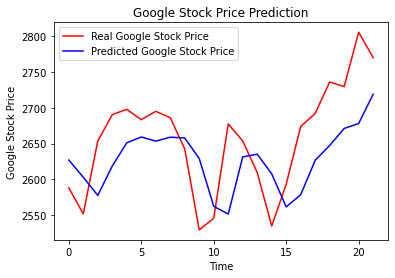

In [268]:
import matplotlib.pyplot as plt
plt.plot(dataset_test_unprocessed['Close'].reset_index(drop=True), color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show();